In [4]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures

In [37]:


def sig_plot(fname,save=False):
    S = np.loadtxt(fname+"/sig.inp").T
    fig,ax1=plt.subplots(2,1,figsize=(10,5))
    Sig = S[1::2] + 1j* S[2::2]
    w = S[0]
    ax=ax1[0]
    for i in range(Sig.shape[0]) :
        ax.plot(w,Sig[i].imag,label=i+1)
    ax.set_xlabel(r'$\Omega_n$', fontsize = 12)
    ax.set_ylabel(r'$\Sigma$', fontsize = 12)
    ax.set_xlim(0,200)
    ax.legend(ncol=3)
    
    ax=ax1[1]
    Gl =  np.loadtxt(fname+"/gl.inp").T
    wl = Gl[0]
    Gl = Gl[1:]
    for i in range(Gl.shape[0]) :
        ax.plot(wl,Gl[i],label=i+1)
    ax.set_xlabel(r'$n_l$', fontsize = 12)
    ax.set_ylabel(r'$G_l$', fontsize = 12)
    ax.legend(ncol=3)
    plt.tight_layout()
    if save:
        plt.savefig(fname+"/sig_g.png")
        

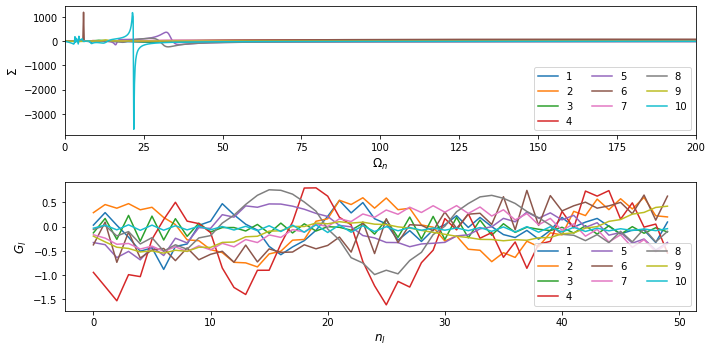

In [38]:
fname='it1'
sig_plot(fname,save=True)


In [212]:
def convergence_test(iters):
    fname=["it"+str(i) for i in iters]
    G=[]
    Gl =  np.loadtxt(fname[0]+"/gl.inp").T
    fig,ax=plt.subplots(Gl.shape[0]-1,1,figsize=(10,Gl.shape[0]*2))
    for i in fname:
        S = np.loadtxt(i+"/sig.inp").T
        Sig = S[1::2] + 1j* S[2::2]
        w = S[0]
        for i1 in range(Sig.shape[0]) :
            ax1=ax[i1]
            ax1.plot(w,Sig[i1].imag,label=i+"-"+str(i1+1))
            ax1.legend(loc='upper right')
        G.append(Sig.imag)
    plt.tight_layout()
    plt.savefig("convergence_sig_g.png",dpi=200)

    f_conv=[];a_conv=[]
    for iter_cnt in range(len(G)-1):
        d1=[];d2=[]
        print("Convergence between {:2d} and {:2d} \n---------------".format(iter_cnt+1,iter_cnt+2))
        for i in range(10):
            curve1=np.zeros((w.shape[0],2))
            curve2=np.zeros((w.shape[0],2))
            curve1[:,0]=w
            curve1[:,1]=G[iter_cnt][i]
            curve2[:,0]=w
            curve2[:,1]=G[iter_cnt+1][i]
            df = similaritymeasures.frechet_dist(curve1, curve2)
            da=1
#             da=similaritymeasures.area_between_two_curves(curve1,curve2)
            print("subspace {:2d} \n\
                Frechet difference = {:2.5f} \n\
                Area difference    = {:2.5f}".format(i+1,df,da))
            d1.append(df);d2.append(da)
        f_conv.append(d1);a_conv.append(d2)
    fig,ax=plt.subplots(figsize=(10,2))
    for i in np.array(f_conv).T:
        ax.scatter(range(len(i)),i)
    ax.set_ylabel("Distance")
    ax.set_xlabel("Iteration")
    plt.tight_layout()
    plt.savefig("convergence.png",dpi=200)

In [209]:
iters=range(1,iter+1)
fname=["it"+str(i) for i in iters]
G=[]
Gl =  np.loadtxt(fname[0]+"/gl.inp").T
for i in fname:
    Gl =  np.loadtxt(i+"/gl.inp").T
    G.append(Gl)
f_conv=[];a_conv=[]
for iter_cnt in range(len(G)-1):
    d1=[];d2=[]
    print("Convergence between {:2d} and {:2d} \n---------------".format(iter_cnt+1,iter_cnt+2))
    for i in range(10):
        curve1=np.zeros((w.shape[0],2))
        curve2=np.zeros((w.shape[0],2))
        curve1[:,0]=wl
        curve1[:,1]=G[iter_cnt][i]
        curve2[:,0]=wl
        curve2[:,1]=G[iter_cnt+1][i]
        df = similaritymeasures.frechet_dist(curve1, curve2)
        da=similaritymeasures.area_between_two_curves(curve1,curve2)
        print("subspace {:2d} \n\
            Frechet difference = {:2.5f} \n\
            Area difference    = {:2.5f}".format(i+1,df,da))
        d1.append(df);d2.append(da)
    f_conv.append(d1);a_conv.append(d2)

Convergence between  1 and  2 
---------------


ValueError: could not broadcast input array from shape (50) into shape (999)

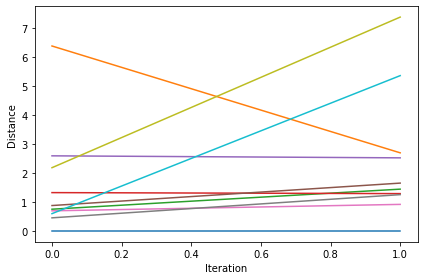

In [200]:
fig,ax=plt.subplots()
for i in np.array(f_conv).T:
    ax.plot(range(len(i)),i)
ax.set_ylabel("Distance")
ax.set_xlabel("Iteration")
plt.tight_layout()

In [7]:
for iter in range(1, 4):
    if iter>1:
        iters=range(1,iter+1)
        convergence_test(iters)

NameError: name 'convergence_test' is not defined

In [226]:
def fprint(text, fname="Convergence.text"):
    with open(fname, 'w+') as f:
        print(text, file=f)
        
def converge(fname):
    
    fname = ["it" + str(i) for i in iters]
    G = []
    Gl = np.loadtxt(fname[0] + "/gl.inp").T
    fig, ax = plt.subplots(Gl.shape[0] - 1, 1, figsize=(10, Gl.shape[0] * 2))
    for i in fname:
        S = np.loadtxt(i + "/sig.inp").T
        Sig = S[1::2] + 1j * S[2::2]
        w = S[0]
        for i1 in range(Sig.shape[0]):
            ax1 = ax[i1]
            ax1.plot(w, Sig[i1].imag, label=i + "-" + str(i1 + 1))
            ax1.legend(loc='upper right')
        G.append(Sig.imag)
    plt.tight_layout()
    plt.savefig("convergence_sig.png", dpi=200)
    plt.close()
    
    from scipy.spatial.distance import directed_hausdorff as dist
    from tabulate import tabulate

    def converge_txt(s):
        rms=[]
        val=[]
        headings=["Iter"]
        headings.extend(["Orb-"+str(i+1) for i in range(10)])
        headings.extend(["Total"])
        for cnt in [[i,i+1] for i in range(0,s.shape[0]-1)]:
            tmp=[str(np.array(cnt)+1).replace("[","").replace("]","").replace(" ","->")]
            tmp.extend([dist([s[cnt[0]][norb]],[s[cnt[1]][norb]])[0] for norb in range(10)])
            tmp.extend([np.sum(tmp[1:])])
            rms.append(tmp)
            val.append(tmp[1:])
        print(tabulate(rms,headers=headings))
        fprint(tabulate(rms,headers=headings))
        return(np.array(val))
    fname=["it"+str(i) for i in iters]
    s=[]
    for i in fname:
        S = np.loadtxt(i+"/sig.inp").T
        Sig = S[1::2] + 1j* S[2::2]
        w = S[0]
        s.append(Sig.imag)
    s=np.array(s)

    vals=converge_txt(s)
    fig,ax=plt.subplots(2,1,figsize=(6,6))
    for j,i in enumerate(vals.T[:-1]):
        ax[1].plot(np.arange(len(i))+1,i,label=str(j+1),marker="o")
    ax[0].plot(np.arange(len(i))+1,vals.T[-1],label="Total",c="k",marker="o")
    for i in ax:
        i.set_ylabel("RMS diff")
        i.set_xlabel("Iter")
        i.legend(ncol=3)
    plt.tight_layout()
    plt.savefig("Convergence_iter.png")
    plt.show()
    plt.close()

range(1, 3)
Iter       Orb1     Orb2     Orb3     Orb4     Orb5    Orb6     Orb7     Orb8     Orb9    Orb10    Total
------  -------  -------  -------  -------  -------  ------  -------  -------  -------  -------  -------
1->2    663.945  331.029  6041.58  970.915  262.319  1168.1  2941.74  650.287  1311.65  348.898  14690.5


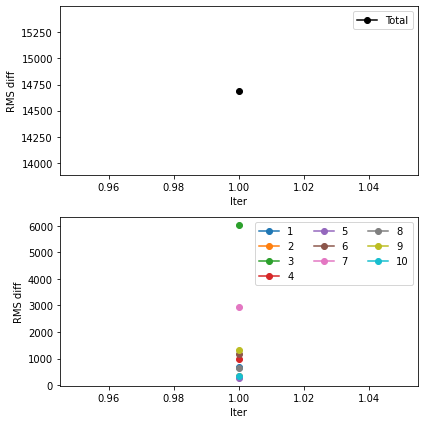

In [219]:
for iter in range(1, 3):
    if iter > 1:
        iters = np.arange(1, iter + 1)
        print(iters)
        converge(iters)

In [284]:
import numpy as np

In [356]:
data=np.loadtxt("dmft_files/spf.temp_1")
y=np.unique(data.T[0])
x=np.unique(data.T[1])
Aup=data.T[2]
Aup=Aup.reshape(y.shape[0],x.shape[0])
Aup[Aup>10]=10
Aup[Aup<-2]=-2

Adown=data.T[3]
Adown=Adown.reshape(y.shape[0],x.shape[0])
Adown[Adown>10]=10
Adown[Adown<-2]=-2

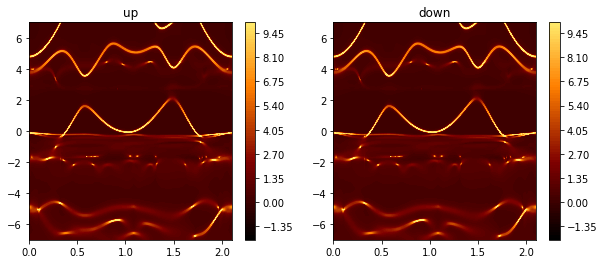

In [358]:
fig,ax1=plt.subplots(1,2,figsize=(10,4))
ax=ax1[0]
r=ax.contourf(x,y,Aup,90,cmap="afmhot",vmin=-2,vmax=15)
plt.colorbar(r,ax=ax)
ax=ax1[1]
r=ax.contourf(x,y,Adown,90,cmap="afmhot",vmin=-2,vmax=15)
plt.colorbar(r,ax=ax)

for i,j in zip(ax1,["up","down"]):i.set_title(j)

In [383]:
from questaal_reader import *
from pymatgen.electronic_structure.plotter import BSPlotter as bp

In [384]:
p=get_bands("dmft_files/bnds.temp")

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:304: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  "Only site.ext format 15 supported at present \n if things dont work That might be the problem"


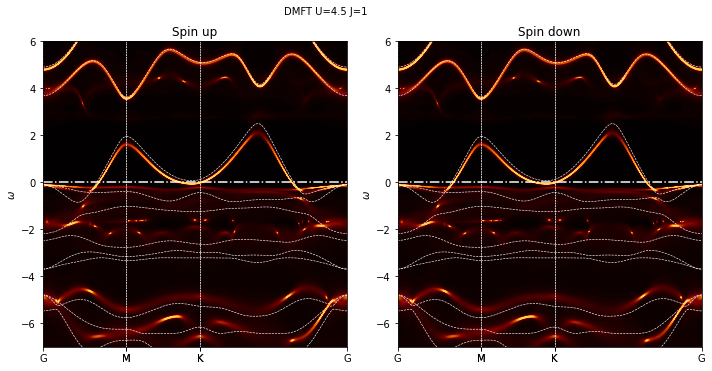

In [463]:


def plot_spin(ax,spin=0):
    for i in range(len(bp(p).bs_plot_data()['distances'])):
        d=bp(p).bs_plot_data()['distances'][i]
        e=bp(p).bs_plot_data()['energy'][i]['1']
        e=np.array(e)/13.6 + 2.5
        for k in e:
            if k[0]>0:c="#e9c46a"
            else:c="#e76f51"
            ax.plot(d,k,c="w",lw=0.6,ls="--")

    for j,i in enumerate(bp(p).bs_plot_data()['ticks']["distance"]):
        ax.axvline(i,c="w",ls="--",lw=.5)
    ax.set_xticks(bp(p).bs_plot_data()['ticks']["distance"])
    ax.set_xticklabels(bp(p).bs_plot_data()['ticks']["label"])
    ax.axhline(0,ls="-.",c="w")
    ax.set_ylim(-7,6)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_ylabel("$\\omega$")
    d=bp(p).bs_plot_data()['ticks']["distance"]
    xnew=np.linspace(d[0],d[-1],len(x))
    if spin==0:
        A=Aup
    else:
        A=Adown
    ax.contourf(xnew,y,Aup,90,cmap="afmhot",vmin=0,vmax=15)
    
fig,ax=plt.subplots(1,2,figsize=(10,5))
for i,j in zip(ax,["Spin up","Spin down"]): i.set_title(j)
plot_spin(ax[0],spin=0)
plot_spin(ax[1],spin=1)
fig.text(0.45,1,"DMFT U=4.5 J=1")
plt.tight_layout()
# plt.savefig("figs/lda+dmft0-U=4.5,J=1.png",dpi=300)